# Analyzing & Selecting best Features to Predict Car Prices with KNN

This project is a learning instrument to understand the worflow of *K-Nearest Neighbors* algorithm for Classification and Regression. 

<b>Objective of the Project:</b> To understand and identify the features/ attributes of car that can help in predicting it's market price, utilizing K-Nearest-Neighbors Algorithm.

<b>About the Dataset:</b> The dataset for this project was created and uploaded by Jeffrey C. Schlimmer at the UCI Machine Learning Repository. The dataset can be downloaded directly from this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

As stated by the author, the data set consists of three types of entities: 

(A) the specification of an auto in terms of various characteristics

(B) its assigned insurance risk rating: 

* risk rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

(C) its normalized losses in use as compared to other cars:

* it is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

## K-Nearest Neighbors Classification (& Regression)

KNN is a non-parametric method proposed by Thomas Cover, and is classified as supervised machine learning. In simplest terms KNN regression can be summarized as:

- Calculate distance betwen available data points and data point in question, using Euclidean Distance
- Identify the nearest neighbors (distance is smallest); the count of these neighbors is knn
- Average the nearest neighbors
- Assign the average as the predicted value for the data point in question

(a basic infographic to summarize KNN)
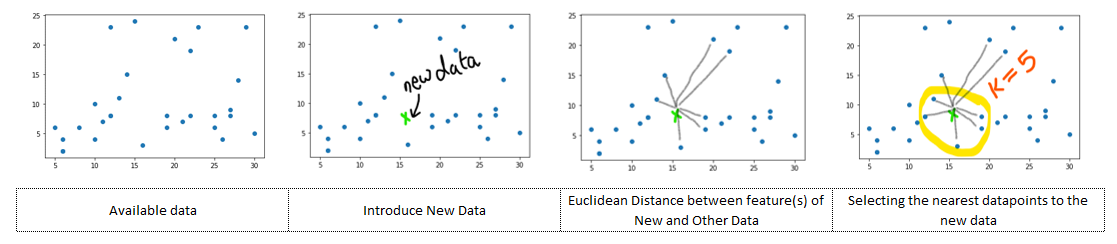

## Import Python Libraries

In [1]:
# fundamental libraries
import pandas as pd
import numpy as np

# sikit-learn libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

# matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", font_scale=1.3)

%matplotlib inline

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Identify encoding of the dataset file

Before we read the dataset and store it in Pandas dataframe let's first decode it's encoding.

In [2]:
import chardet

with open("imports-85.data", "rb") as data_file:
    result = chardet.detect(data_file.read(10))
    print(result)
#     result = data_file.read(50)
#     print("50 bytes of data:", result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


## Read and Explore the dataset

In [3]:
pd.read_csv("imports-85.data", sep = ",", encoding = "ascii").head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


## Assign column names to dataframe

Since the dataset file "imports_85" is a `.data` file, directly reading it didn't yield columns headers. So manually adding columns to the Pandas dataframe.

In [4]:
# re-read .csv file with column names included to be assigned to dataframe
imports_85 = pd.read_csv(filepath_or_buffer = "imports-85.data", sep = ",", encoding = "ascii", header = None,
                         names = [ "symboling", "normalized_losses", "make", "fuel_type", "aspiration", 
                                   "num_of_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", 
                                   "length", "width", "height", "curb_weight", "engine_type", "num_of_cylinders", 
                                   "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
                                   "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
                                 ])
# display header rows
imports_85.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Explore dataframe

In [5]:
imports_85.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [6]:
# descriptive statistics for dataset 
imports_85.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


The `normalized_losses` and `price` columns both are object datatype series for now, hence they are not included in the DataFrame.describe() above. 

To check out values for these two columns, the describe method below will only include the object datatype series.

In [7]:
 imports_85.describe(include = "object")

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


### Replace "?" character  with None

Both the `normalized_losses` and `price` columns show character `?` for missing data. We will first replace this character with None.

In [8]:
imports_85.replace("?", np.NaN, inplace = True)

In [9]:
pd.options.display.max_columns = 30
# pd.options.display.max_colwidth = 10

imports_85.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Datatype Conversion

Based on the data definition, certain columns are actually numeric or float type but are stored as object datatype. Before we convert them, we will first check if they have None values. If yes we will cleanse or transform these columns separately.

In [10]:
# filter columns with null values

print("Columns from dataset which have null values:")
print(imports_85[imports_85.columns[imports_85.isnull().sum()>0]].isnull().sum())

Columns from dataset which have null values:
normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64


In [11]:
# This is an exprimental code hence commented
# index_col = {}
# for i in range(len(imports_85.columns)):
#     index_col[i] = [imports_85.columns[i], imports_85[imports_85.columns[i]][10]]
# index_col

In [12]:
# columns not considered for conversion yet = ["normalized_losses", "bore" , "stroke", "horsepower", "peak_rpm", "price"]
discrete_cols = [ "curb_weight", "engine_size", "city_mpg", "highway_mpg"]

continous_cols = ["wheel_base", "length", "height",  "compression_ratio"]

# object dtype columns converted to int
for each_col in discrete_cols:
    imports_85[each_col] = imports_85[each_col].astype(int, copy = True, errors = "raise")    
    
# object dtype columns converted to float   
for each_col in continous_cols:
    imports_85[each_col] = imports_85[each_col].astype(float, copy = True, errors = "raise")    


## Data cleanup time!

We already have the columns which contain nulls. Let's check the percentage of rows with these None values.

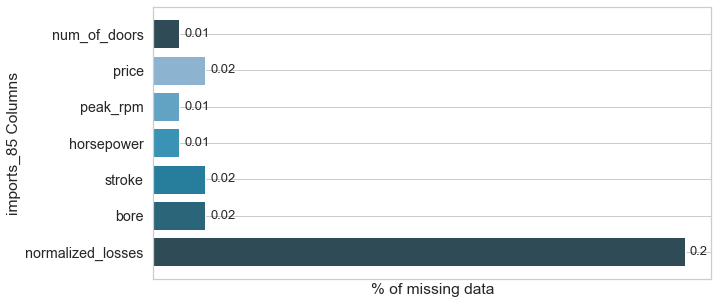

In [13]:
fig, ax = plt.subplots(figsize = (10, 5))

col_nulls = (imports_85[["normalized_losses", "bore" , "stroke", "horsepower", 
                         "peak_rpm", "price", "num_of_doors"]].isnull().sum()/ imports_85.shape[0])

ax.barh(y = col_nulls.index, width = col_nulls.values, color = sns.color_palette("PuBuGn_d"))
ax.set_ylabel("imports_85 Columns")
ax.set_xticks([])
ax.set_xlabel("% of missing data")


# to annotate the plot 
for y, x, val in zip(*[col_nulls.index, col_nulls.values, list(map(str, col_nulls.values.round(3)))]):
    ax.text(x = x + max(col_nulls.values) * 0.01, y = y, s = val, va = "center", fontsize = 13)

plt.show()

### Observations for column num_of_doors

*These cars have no doors! How do we get in, and if we are in how do we get out?!* As the none value rows represent less than 1% of total rows we will drop these rows from dataset.

In [14]:
imports_85[imports_85["num_of_doors"].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


### Observations for columns bore and stroke

Taking reference from [Wikipedia page](https://en.wikipedia.org/wiki/Stroke_ratio), the bore and stroke values are used for Stroke ratio - the ratio between cylinder bore diameter and piston stroke length. This ratio can be different for the same model variants within a model group. 

Since we don't have a clear way to figure out the missing values for these columns, we will drop these rows from the dataset.

In [15]:
imports_85[imports_85["bore"].isnull() | imports_85["stroke"].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


### Observations for columns horsepower and peak_rpm

If we want to calculate horsepower of a car we need to know it's torque (T) and engine's revolutions per minute (RPM). Then horsepower can be calculated as: 

<newline></newline>
<center>$HP = RPM * T$</center>

And if we know the horsepower of a car, we can calculate the RPM of the engine for the car. Since we have none of the information, we will have to drop these rows from the dataset as well.

In [16]:
imports_85[imports_85["horsepower"].isnull() | imports_85["peak_rpm"].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


### Observations for columns price & normalized_losses

This one is tricky! The author suggests that the normalized loss for a car is for the insured year and is dependent on the classification based on size or make features.

I googled a bit to find out if these two columns are related with each other. The search results indicate, that the insurance losses are actually considered by the insurance companies while calculating the insurance premium of newer similar models or subsequent model variants, which have been launched by the brand. However I couldn't really find any solid basis, that a car brand would take into account these losses while deciding the base/sticker price for it's new model.

Here are few of the search results I referred to: 
- https://www.iihs.org/ratings/insurance-losses-by-make-and-model
- https://www.theautochannel.com/news/2005/04/15/040271.html
- https://www.quora.com/What-determines-the-base-price-of-a-new-car-model

The second link could have helped us in replacing some of the None values for this dataset. Alas! we don't have exact model names or definitions in the dataset. 

My graphical attempt to identify if there is a correlation between price and normalized losses, gave me the mumbo-jumbo scatter plot (in red) below. 

Basis this I decided to not to consider normalized_losses column altogether for the KNN modelling.

<font color = "crimson">(In case my assumption is completely wrong, please help me rectify it by giving your feedback, comments for the project!)</font>

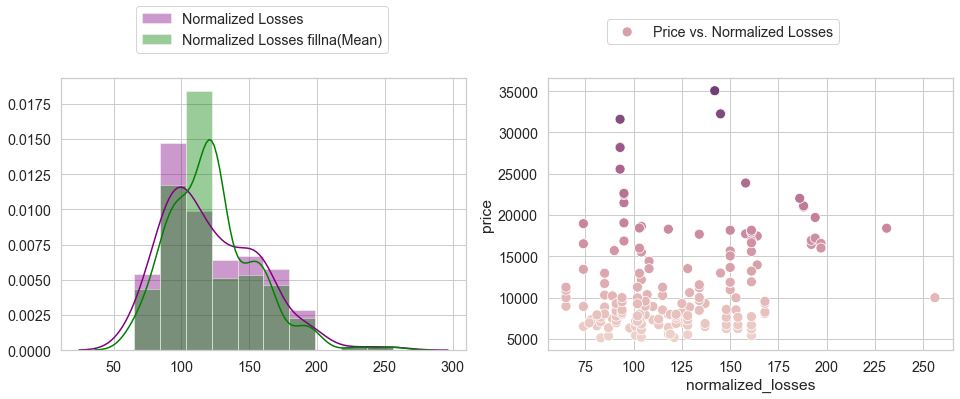

In [17]:
norm_loss_mean = imports_85["normalized_losses"].astype(float).mean()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))

sns.distplot(a = imports_85["normalized_losses"], 
             ax = ax[0], color = "purple", bins = 10, label = "Normalized Losses", axlabel = False)

sns.distplot(a = imports_85["normalized_losses"].astype(float).fillna(norm_loss_mean), 
             ax = ax[0], color = "green", bins = 10, label = "Normalized Losses fillna(Mean)", 
             axlabel = False)

sns.scatterplot(x = imports_85["normalized_losses"].astype(float),
                y = imports_85["price"].astype(float), ax = ax[1], 
                hue = imports_85["price"].astype(float), 
                size = imports_85["price"].astype(float), sizes = (100, 100),
                legend = False, label = "Price vs. Normalized Losses",
                )

for each_ax in ax[:1]:
    handles, labels = each_ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.3, 1.1))

fig.legend(ax[1].get_legend_handles_labels()[0], ax[1].get_legend_handles_labels()[1],
           loc='upper center', bbox_to_anchor=(0.7, 1.065))
    
plt.show()

# sns.palplot(sns.color_palette("hls")[-2]) #) #sns.color_palette("hls")

In [18]:
imports_85[imports_85["price"].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


### Cleansed dataset
We can use these above 4 records with missing values for Price to test our model later. Although, we may not have an actual Price data to compare our predicted values. We will try to work on that later. 

In [19]:
imports_85_clean = imports_85.drop("normalized_losses", axis = 1)

imports_85_clean.dropna(axis = 0, inplace = True)

imports_85_clean.shape

(193, 25)

In [20]:
imports_85_clean = imports_85_clean.astype({"bore" : float, "stroke" : float, "horsepower" : int, "peak_rpm" : int,
                         "price" : float})

### Normalize numeric columns to be between [0,1]

We are using KNN algorithm which calculates the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

We will apply Rescaling i.e. min-max normalization to bring the values for all of the numeric features to be between 0 and 1.

In [21]:
# normalize numeric columns except for price column
numeric_df = imports_85_clean.select_dtypes(np.number).drop("price", axis = 1) 

normalized_df = numeric_df.apply(lambda val: (val - val.min())/(val.max() - val.min()), axis = 1)

normalized_df["price"] = imports_85_clean["price"]

# segregate categorical columns
categorical_df = imports_85_clean.select_dtypes(object)

# concatenate columns to norm dataframe
imports_85_norm = pd.concat([normalized_df, categorical_df], axis = 1)

# reset column sequence of norm dataframe as that of clean dataframe
imports_85_norm = imports_85_norm[imports_85_clean.columns]

imports_85_norm.tail()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,0.0,volvo,gas,std,four,sedan,rwd,front,0.020385,0.035142,0.012942,0.010461,0.546751,ohc,four,0.026291,mpfi,0.000885,0.000768,0.001944,0.021292,1.0,0.004444,0.005369,16845.0
201,0.0,volvo,gas,turbo,four,sedan,rwd,front,0.020770,0.035805,0.013167,0.010658,0.575363,ohc,four,0.026787,mpfi,0.000902,0.000783,0.001830,0.030372,1.0,0.003773,0.004905,19045.0
202,0.0,volvo,gas,std,four,sedan,rwd,front,0.020015,0.034503,0.012707,0.010271,0.547719,ohcv,six,0.031631,mpfi,0.000833,0.000704,0.001781,0.024541,1.0,0.003454,0.004363,21485.0
203,0.0,volvo,diesel,turbo,four,sedan,rwd,front,0.022933,0.039533,0.014559,0.011768,0.670277,ohc,six,0.030410,idi,0.000835,0.000916,0.004999,0.022287,1.0,0.005624,0.005832,22470.0
204,0.0,volvo,gas,turbo,four,sedan,rwd,front,0.020385,0.035142,0.012942,0.010461,0.567117,ohc,four,0.026291,mpfi,0.000885,0.000768,0.001944,0.021292,1.0,0.003703,0.004814,22625.0


## Train-Test-Split Model

Now we start some modelling. Let's begin with Train-Test-Split modelling. The general steps involved are:

- randomize dataset
- split the dataset into two parts
  - a train set (generally 75-80% of whole dataset) and
  - a test set (generally remaining 25-20% of whole dataset)
- train the model using the training set
- test the model on test set and predict values for target
- calculate the difference between the actual values and predicted values of the target
- select the features which give lowest difference between actual and predicted values 

The training set helps the model to quantify the effect of features on the target. Once the model understands the pattern, we can then use it on the test data, which becomes the unknown data for the model. 

For this project target is fixed, "price" of the car that we want to predict, and the features or independent variables are the attributes - such as engine's rpm, wheel diameter etc. 

### Univariate model using default nearest neighbors = 5

In univariate modelling, we take only one feature and use that to predict the target value.

The default value for nearest neighbors count for sikit learn's KNNRegressor module is 5. We will first work with default value.

In [22]:
""" function to split the data into training and testing datasets """
def split_dataset(dataset):
    
    # using sklearn's train_test_split module to randomize and split the dataset in two parts
    # 75% rows for Training and 25% rows for Testing
    test_df, train_df = train_test_split(dataset, test_size = 0.25, train_size = 0.75, shuffle = "True", random_state = 1)
    
    return train_df, test_df

In [23]:
"""Function to calculate univariate Root Mean Squared Error given a Feature and Target Column and Dataset"""
def univariate_knn_5(feature, target):
    
        # obtain the train and test dataframes using split_dataset function
        train_df, test_df = split_dataset(imports_85_norm)

        # instantiate object of KNNRegressors Class
        knn = KNeighborsRegressor()

        # fit the model to the train dataset
        knn.fit(X = np.array(train_df[feature]).reshape(-1,1), y = train_df[target])

        # predict target values for test dataset
        predicted_target = knn.predict(X = np.array(test_df[feature]).reshape(-1, 1))

        # calculate Mean Squared Error using sikit-learn mse module
        univariate_mse = mean_squared_error(y_true = test_df[target], y_pred = predicted_target)
    
        # calculate RMSE as square-root of MSE 
        univariate_rmse = np.sqrt(univariate_mse)   
        
        return univariate_rmse

In [24]:
# exclude "price" column from all numeric columns selected as feature columns
feature_cols = imports_85_norm.select_dtypes(np.number).columns.difference(["price"])

# set the target column "price"
target_col = "price"

rmse_default_k = {}

# for loop to execute "univariate knn function with default k = 5"
for each_col in feature_cols:
    rmse_default_k[each_col] = univariate_knn_5(feature = each_col, target = target_col)
    
rmse_default_k = dict(sorted(rmse_default_k.items(), key = lambda x: x[1], reverse = True))

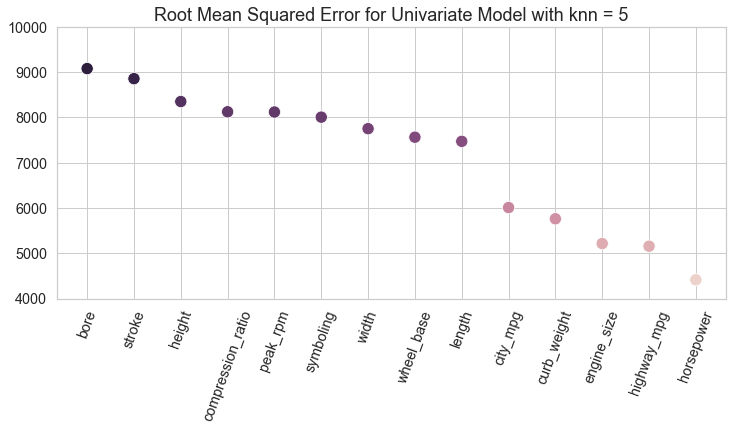

In [25]:
fig, ax = plt.subplots(figsize = (12, 5))

sns.scatterplot(x = [key for key in rmse_default_k.keys()], 
                y = [value for value in rmse_default_k.values()], 
                hue = [value for value in rmse_default_k.values()],
                size = [value for value in rmse_default_k.values()], sizes = (150, 150), 
                ax = ax, legend = False)

ax.set_ylim(4000, 10000)
ax.tick_params(axis = "x", labelrotation = 70)
ax.set_title("Root Mean Squared Error for Univariate Model with knn = 5", fontsize = 18)
plt.show()

### Univariate Modelling with varying knn

In [26]:
"""Function to calculate univariate Root Mean Squared Error given a Feature & Target Column and Dataset with varying the count
K i.e. nearest neighbors"""

def univariate_knn_vary(feature, target, dataset, k):
        
        # obtain the train and test dataframes using split_dataset function
        train_df, test_df = split_dataset(imports_85_norm)

        # instantiate object of KNNRegressors Class with a varying K (i.e. count of nearest neighbor changes)
        knn = KNeighborsRegressor(n_neighbors = k)

        # fit the model to the train dataset
        knn.fit(X = np.array(train_df[feature]).reshape(-1,1), y = train_df[target])

        # predict target values for test dataset
        predicted_target = knn.predict(X = np.array(test_df[feature]).reshape(-1, 1))

        # calculate MSE using sk-learn's mse module
        univariate_mse = mean_squared_error(y_true = test_df[target], y_pred = predicted_target)
    
        # calculate RMSE as square-root of MSE, rounded to 5 decimal digits
        univariate_rmse = np.round(np.sqrt(univariate_mse),5)
        
        return k, feature, univariate_rmse

In [27]:
# exclude "price" column from all numeric columns selected as feature columns
feature_cols = imports_85_norm.select_dtypes(np.number).columns.difference(["price"])

# set the target column "price"
target_col = "price"

# list of k's to be passed to KNNRegressor object
nearest_neighbors = [1, 3, 5, 7, 9]

# empty list to capture k count, feature and it's RMSE value together as a tuple
predicted_values = []

# for loop to cycle though all k values
for each_k in nearest_neighbors:    
    
    # for loop to cycle through all features
    for each_col in feature_cols:
        predicted_values.append(univariate_knn_vary(feature = each_col, target = target_col, 
                                               dataset = imports_85_norm, k = each_k))

# dataframe converted from the predicted value list
rmse_vary_k_df = pd.DataFrame(data = predicted_values, columns = ["knn", "feature", "RMSE"])

# rmse_vary_k_df.sort_values(by = ["RMSE","feature","k"], ascending = False, inplace= True)

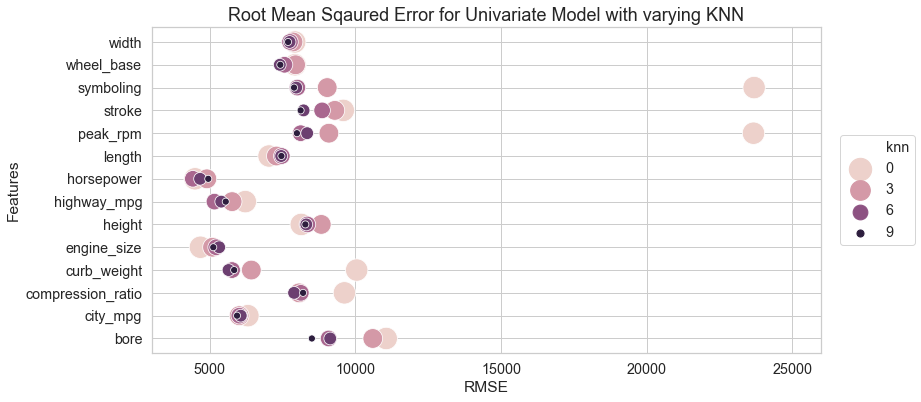

In [28]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(y = rmse_vary_k_df["feature"], 
                x = rmse_vary_k_df["RMSE"], 
                hue = rmse_vary_k_df["knn"], size = rmse_vary_k_df["knn"], sizes = (500, 50),
                ax = ax)

ax.set_xlim(3000, 26000)
ax.set_ylabel("Features")
# ax.tick_params(axis = "y", labelrotation = 70)
ax.legend(bbox_to_anchor = (1.15,0.5), loc = "center right")
ax.set_title("Root Mean Sqaured Error for Univariate Model with varying KNN", fontsize = 18)

plt.show()

Based on the above results from Train-Test-Split model, following features can be considered for multivariate modelling:
- horsepower
- engine_size
- highway_mpg
- city_mpg
- curb_weight
- length

## Multivariate Model

Multivariate model implies that we don't rely only on one feature or indpendent variable to predict the value for the target. 
KNN helps identity the most relevant features based on the lowest values of RMSE. As observed above "horsepower" and "engine_size" features give us the lowest RMSE across all knn's we tried (1, 3, 5, 7 & 9). 

Let's take the average of these RMSE's and then select our first few features with lowest average RMSE. Then we will try to optimize the hyperparameter using grid search method. 

In [29]:
# average the RMSE's for each feature across all hyperparameters (1, 3, 5, 7, 9)
print("average value of RMSE for each features:")
print("----------------------------------------")

for idx, val in rmse_vary_k_df.groupby("feature")["RMSE"].mean().sort_values().items():    
    print("{idx} : {val}".format(idx = idx, val = val))
    
feature_avg_rmse = [col for col in rmse_vary_k_df.groupby("feature")["RMSE"].mean().sort_values().index]

average value of RMSE for each features:
----------------------------------------
horsepower : 4680.210484
engine_size : 5082.22935
highway_mpg : 5612.845318
city_mpg : 6061.473980000001
curb_weight : 6739.030686
length : 7337.224683999999
wheel_base : 7648.920746000001
width : 7787.163467999999
compression_ratio : 8378.969052
height : 8379.563018
stroke : 8811.630076
bore : 9671.439902
symboling : 11316.253472
peak_rpm : 11440.574467999999


### Multivariate model with default knn = 5

In [30]:
"""Function to calculate multivariate Root Mean Squared Error given Feature columns & a Target Column and a Dataset"""
def multivariate_knn_5(features, target, dataset):
    
    # obtain the train and test dataframes using split_dataset function
    train_df, test_df = split_dataset(imports_85_norm)

    # instantiate object of KNNRegressors Class
    knn = KNeighborsRegressor(n_neighbors = 5)

    # fit the model to the train dataset
    knn.fit(X = train_df[features],  y = train_df[target])

    # predict target values for test dataset
    predicted_target = knn.predict(X = test_df[features])

    # calculate MSE using sk-learn's mse module
    multivariate_mse = mean_squared_error(y_true = test_df[target], y_pred = predicted_target)

    # calculate RMSE as square-root of MSE rounded to 5 decimal places
    multivariate_rmse = np.round(np.sqrt(multivariate_mse), 5)

    return multivariate_rmse

In [31]:
# test model for - top 2, top 3, top 4, top 5 and top 6 features from feature_avg_rmse series
target_col = "price"

for nf in range(2,7):
    features = feature_avg_rmse[:nf]  
    multi_rmse = multivariate_knn_5(features = features, target = target_col, dataset = imports_85_norm)
    print("RMSE for {} features {} = {}".format(nf, features, multi_rmse))

RMSE for 2 features ['horsepower', 'engine_size'] = 4244.34016
RMSE for 3 features ['horsepower', 'engine_size', 'highway_mpg'] = 3975.51698
RMSE for 4 features ['horsepower', 'engine_size', 'highway_mpg', 'city_mpg'] = 3980.50931
RMSE for 5 features ['horsepower', 'engine_size', 'highway_mpg', 'city_mpg', 'curb_weight'] = 5561.67396
RMSE for 6 features ['horsepower', 'engine_size', 'highway_mpg', 'city_mpg', 'curb_weight', 'length'] = 5504.66021


Out of curiosity I tried to see the effect of all the features when applied together on the model and the result is explained by the line plot below!  

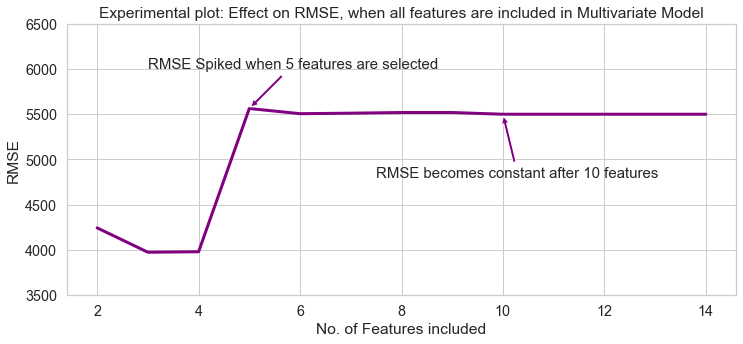

In [32]:
""" this is an experimental code """
target_col = "price"
exp_multi_rmse = []

for nf in range(len(feature_avg_rmse) - 1):
    # select no. of features from list
    features = feature_avg_rmse[:nf+2]  
    
    # append the calculated RMSE values using multivariate_knn_5 function
    exp_multi_rmse.append(multivariate_knn_5(features = features, target = target_col, dataset = imports_85_norm))
    
fig, ax = plt.subplots(figsize = (12,5))

sns.lineplot(x = [i for i in range(2, 15)], y = exp_multi_rmse, ax = ax, color = "purple", lw = 3)

ax.set_ylim(3500, 6500)
ax.set_title("Experimental plot: Effect on RMSE, when all features are included in Multivariate Model",)
ax.set_xlabel("No. of Features included")
ax.set_ylabel("RMSE")

ax.annotate(text = "RMSE Spiked when 5 features are selected",
            xy = (5, max(exp_multi_rmse)), xytext = (3, 6000),
            arrowprops = {"arrowstyle" : "simple", "facecolor" : "purple"}, fontsize = 15)

ax.annotate(text = "RMSE becomes constant after 10 features", 
            xy = (10, pd.Series(exp_multi_rmse).mode()[0]), xytext = (7.5, 4800),
            arrowprops = {"arrowstyle" : "simple", "facecolor" : "purple"}, fontsize = 15)

plt.show()

Adding the above observations as well, we can conclude that the combination of these features - 'engine_size', 'horsepower', and 'highway_mpg' give us the lowest RMSE for Price.

### Multivariate model with varying hyperparameter

Now we try to optimize the hyperparameter of the model. To do this we first have to select most suitable models that predict the car price with least error.

In [33]:
""" Function to calculate multivariate Root Mean Squared Error given
   Feature columns & a Target Column, a Dataset and count of nearest neighbors to consider """

# modify function multivariate_knn_5 to accpt varying knn values
def multivariate_vary_knn(features, target, dataset, k):
    
    # obtain the train and test dataframes using split_dataset function
    train_df, test_df = split_dataset(imports_85_norm)

    # instantiate object of KNNRegressors Class
    knn = KNeighborsRegressor(n_neighbors = k)

    # fit the model to the train dataset
    knn.fit(X = train_df[features],  y = train_df[target])

    # predict target values for test dataset
    predicted_target = knn.predict(X = test_df[features])

    # calculate MSE using sk-learn's mse module
    multivariate_mse = mean_squared_error(y_true = test_df[target], y_pred = predicted_target)

    # calculate RMSE as square-root of MSE rounded to 5 decimal places
    multivariate_rmse = np.round(np.sqrt(multivariate_mse), 5)

    return multivariate_rmse

In [34]:
# range for hyperparameters to be used
hyper_params = range(1, 26)

# best suited features selected
model_features = feature_avg_rmse[:6]

print("Features selected for the model:", model_features)

knn_rmse_dict = {}

# for loop - to calculate RMSE for models with 2, 3, 4, 5, and 6 best suited features
for nf in [2, 3, 4, 5, 6]:
    features = model_features[:nf]

    # for loop to calculate RMSE values for each of the hyperparameter
    for hp in hyper_params:
        hp_rmse = multivariate_vary_knn(features = features, target = "price", dataset = imports_85_norm, k = hp)
        
        # assign the count of features, count of hyper-parameters and rmse result to dictionary
        knn_rmse_dict[(nf, hp)] = hp_rmse    

# convert dictionary to a Pandas dataframe
hyperparams_df = pd.DataFrame({"num_of_features" : [each_key[0] for each_key in knn_rmse_dict.keys()],
                               "knn" : [each_key[1] for each_key in knn_rmse_dict.keys()],
                               "RMSE" : [rmse_val for rmse_val in knn_rmse_dict.values()]
                              })

Features selected for the model: ['horsepower', 'engine_size', 'highway_mpg', 'city_mpg', 'curb_weight', 'length']


In [35]:
# lowest 10 RMSE values
hyperparams_df.sort_values("RMSE", ascending = False).tail(10)

,num_of_features,knn,RMSE
52,4,3,4030.06286
54,4,5,3980.50931
29,3,5,3975.51698
53,4,4,3957.75374
50,4,1,3718.76577
1,2,2,3716.05440
0,2,1,3715.35499
25,3,1,3699.55402
26,3,2,3641.71190
51,4,2,3629.50380


### Examine the hyperparameters for which RMSE is lowest and highest 

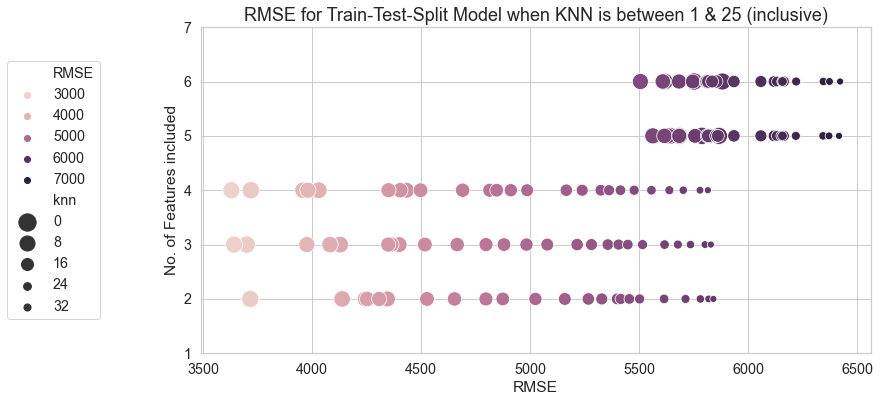

In [36]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(y = hyperparams_df["num_of_features"], x = hyperparams_df["RMSE"],
                hue = hyperparams_df["RMSE"], size = hyperparams_df["knn"], sizes = (300, 50), ax = ax)

ax.set_ylim(1, 7)
ax.set_ylabel("No. of Features included")
ax.set_title("RMSE for Train-Test-Split Model when KNN is between 1 & 25 (inclusive)", fontsize = 18)
ax.legend(bbox_to_anchor = (-0.3, 0.5), loc = "center left");

The results of the Train-Test-Split model can be summarized as: 
- the features that can help us predict a car's price primarily are - "horserpower", "engine_size", "highway_mpg", "city_mpg" as they have provide with the lowest RMSE
- additional features helpful in model are - "curb_weight", "length"
- the model gives the lowest RMSE when hyperparameter is 2 and number of features is 4

We are not stopping here! In order to test and verify the effectiveness of these features, we will subject the dataset to K-Fold cross validation next.

## K-Fold Validation

Splitting the dataset into 75% & 25% proportions can introduce bias in the model, as the model trains only for the fomer proportion as training set. In order to reduce this bias we can use the K-Fold Cross-Validation. 

The K-Fold validation disects the datasets into k-fold or k equal parts. 
One segment is always treated as a test set and the other segments are clubbed together to be a training set. 
The algorithm provides the advantage of having larger portion of data for training, while cycling through the entire dataset, so as to avoid any bias due to specific subset.  

The algorithm workflow for K-Fold validation is as follows:

- Split the full dataset into k equal length partitions.
    - Select k-1 partitions as the training set
    - select the remaining partition as the test set
- Train the model on the training set.
- Use the trained model to predict labels on the test fold.
- Compute the test fold's error metric.
- Repeat all of the above steps k-1 times, until each partition has been used as the test set for an iteration.
- Calculate the mean of the k error values.

<img src='k_fold_cross_val_image.PNG'>

### Univariate Model with K-Fold

We will again start with univariate model with k-nearest-neighbors = 5 and k-folds = 5

In [37]:
# instantiate object of K-Folds cross validator
# Dataset is split into 5 equal parts, randomized and random_state is set to 1 for reproducibility
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)

# instantiate obbject of KNeighborsRegressor module
knn = KNeighborsRegressor(algorithm = "auto", n_neighbors = 5)

# set the target column 
target = "price"

# empty dictionary to capture resultant RMSE's
feature_rmse = {}

# for loop to calculate RMSE values for each of car features
for each_feature in imports_85_norm.select_dtypes(np.number).drop("price", axis = 1).columns:
    
    # using cross_val_score method to calculate the Mean Squared Errors for each feature
    mses = cross_val_score(estimator = knn, 
                           X = np.array(imports_85_norm[each_feature]).reshape(-1, 1),
                           y = imports_85_norm[target],
                           scoring = "neg_mean_squared_error", cv = kf)
    
    # capture feature and respective RMSE value
    feature_rmse[each_feature] = np.sqrt(np.abs(mses)).mean()

# display the results    
[(key,value) for key,value in sorted(feature_rmse.items(), key = lambda x: x[1], reverse = False)]

[('engine_size', 4002.218414588712),
 ('horsepower', 4190.760477765859),
 ('highway_mpg', 5221.624460108504),
 ('city_mpg', 5909.14368579703),
 ('curb_weight', 6262.5246813261965),
 ('stroke', 7034.158576183865),
 ('bore', 7342.600236895325),
 ('wheel_base', 7362.317152067032),
 ('length', 7521.046028593371),
 ('width', 7606.6157776290975),
 ('compression_ratio', 7724.299042271683),
 ('height', 8201.685218900764),
 ('peak_rpm', 8614.800308624883),
 ('symboling', 9359.190203363833)]

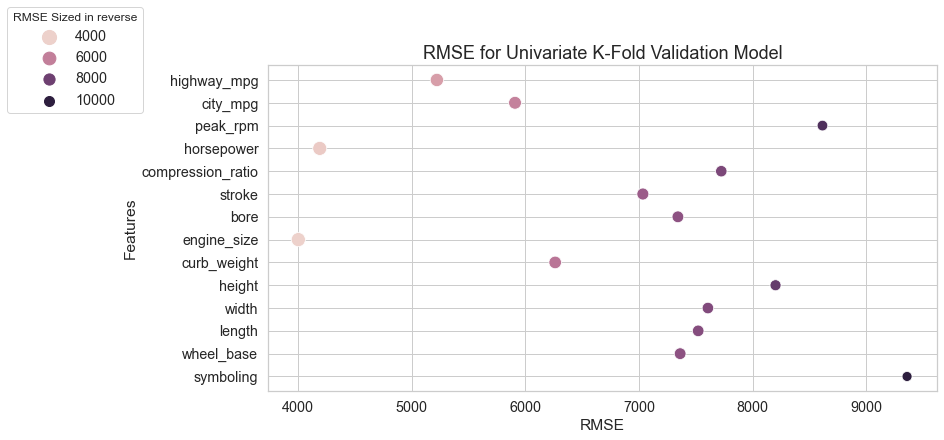

In [38]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(y = [feature for feature in feature_rmse.keys()], 
                x = [feature for feature in feature_rmse.values()], 
                hue = [feature for feature in feature_rmse.values()], 
                size = [feature for feature in feature_rmse.values()], sizes = (200, 100), ax = ax)

ax.set_ylabel("Features")
ax.set_xlabel("RMSE")
ax.set_title("RMSE for Univariate K-Fold Validation Model", fontsize = 18)
ax.legend(bbox_to_anchor = (-0.4, 1.2), loc = "upper left", title = "RMSE Sized in reverse")

plt.show()

The results for univariate K-Fold validation are similar to the Train-Test-Split validation for the features with lowest RMSE.

### Univariate Model with K-fold = 5 and varying K-nearest-neighbors

In [39]:
# instantiate object of K-Folds cross validator
# Dataset is split into 5 equal parts, randomized and random_state is set to 1 for reproducibility
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)

# set the target variable
target = "price"
feature_rmse_vary_knn = {}

# for loop to calculate MSE and RMSE values for hyperparameters from 1 to 25
for each_knn in range(1,10,2):
    
    knn = KNeighborsRegressor(algorithm = "auto", n_neighbors = each_knn)
    
    # scoring method used is mean squared error
    for each_feature in imports_85_norm.select_dtypes(np.number).drop("price", axis = 1).columns:
        mses = cross_val_score(estimator = knn, 
                               X = np.array(imports_85_norm[each_feature]).reshape(-1, 1),
                               y = imports_85_norm[target],
                               scoring = "neg_mean_squared_error", cv = kf)
        
        # collect the values in dictionary
        feature_rmse_vary_knn[(each_knn, each_feature)] = np.sqrt(np.abs(mses)).mean()

In [40]:
# create a dataframe using the feature_rmse dictionary
uni_feature_rmse_df = pd.DataFrame(data = [[each_key[0] for each_key in feature_rmse_vary_knn.keys()],
                                           [each_key[1] for each_key in feature_rmse_vary_knn.keys()],
                                           feature_rmse_vary_knn.values()]).T
# assign column names to dataframe
uni_feature_rmse_df.columns = ["knn", "feature", "RMSE"]

# reset datatype for numeric columns
uni_feature_rmse_df.astype({"knn" : int, "RMSE" : float})

# display last 5 rows
uni_feature_rmse_df.tail()

,knn,feature,RMSE
65,9,compression_ratio,7618.93
66,9,horsepower,4070.16
67,9,peak_rpm,8753.23
68,9,city_mpg,6025.19
69,9,highway_mpg,5253.25


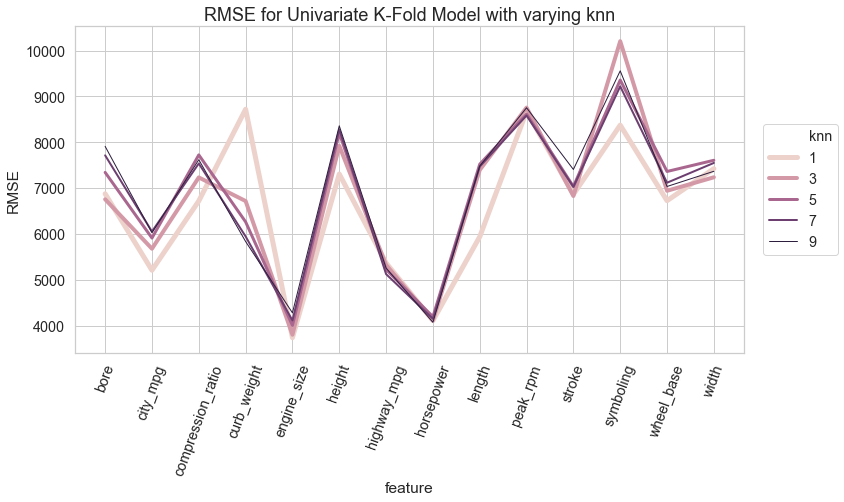

In [41]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.lineplot(x = uni_feature_rmse_df["feature"], y = uni_feature_rmse_df["RMSE"].astype(float), 
             hue = uni_feature_rmse_df["knn"], size = uni_feature_rmse_df["knn"], sizes = (5, 1),
             ax = ax, legend = "full")
ax.set_title("RMSE for Univariate K-Fold Model with varying knn", fontsize = 18)
ax.tick_params(axis = "x", labelrotation = 70)
ax.legend(bbox_to_anchor = (1.15, 0.5), loc = "center right")

plt.show()


The following 5 features are still providing the lowest values for RMSE using the K-Fold cross validation, as the Train-Test-Split validation, even with multiple hyperparameters: 

- engine_size
- horsepower
- highway_mpg
- city_mpg
- curb_weight

However the length feature which was the 6th features earlier is now giving higher price values as compared to stroke and wheel_base.

### Multivariate Model with K-Fold = 5 and knn = range(1, 25)

Here we calculate the multivariate RMSE values for the selected features which show lowest RMSEs.

In [42]:
# instantiate object of K-Folds cross validator
# Dataset is split into 5 equal parts, randomized and random_state is set to 1 for reproducibility
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)

target = "price"
multi_feature_rmse = {}

# select features with lowest RMSE
selected_features = ["engine_size", "horsepower", "highway_mpg", "city_mpg", "curb_weight"]

# calculate RMSE for multivariate model incr
for hyp_count in range(1, 25):
    for i in range(2, len(selected_features) + 1):
        knn = KNeighborsRegressor(algorithm = "auto", n_neighbors = hyp_count)

        features = selected_features[:i]
        mses = cross_val_score(estimator = knn, X = imports_85_norm[features], 
                               y = imports_85_norm[target],
                               scoring = "neg_mean_squared_error", cv = kf)

        multi_feature_rmse[(hyp_count,i)] = np.sqrt(np.abs(mses)).mean()

In [43]:
# assign results to a dataframe from dictionary
multi_feature_rmse_df = pd.DataFrame(data = [[each_key[0] for each_key in multi_feature_rmse.keys()],
                                             [each_key[1] for each_key in multi_feature_rmse.keys()],
                                             multi_feature_rmse.values()]).T

# change the column names in dataframe
multi_feature_rmse_df.columns = ["knn", "num_of_features", "RMSE"]

# change the datatype for numeric series from object to int/ float
multi_feature_rmse_df.astype({"knn" : int, "RMSE" : float})

# display last 5 rows from dataframe
multi_feature_rmse_df.tail()

,knn,num_of_features,RMSE
91,23.0,5.0,5645.370280
92,24.0,2.0,4487.944007
93,24.0,3.0,4463.009296
94,24.0,4.0,4450.681719
95,24.0,5.0,5662.934183


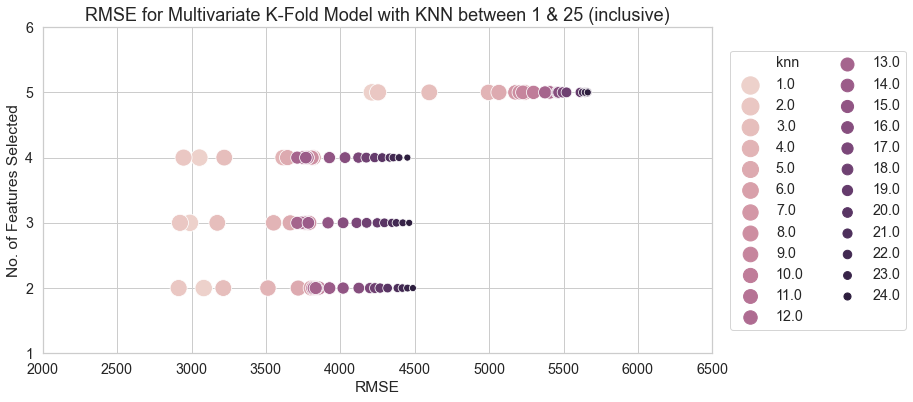

In [44]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(y = multi_feature_rmse_df["num_of_features"], x = multi_feature_rmse_df["RMSE"].astype(float),
                hue = multi_feature_rmse_df["knn"], size = multi_feature_rmse_df["knn"], sizes = (300, 50),
                ax = ax, legend = "full")

ax.set_ylabel("No. of Features Selected")
ax.set_xlim(2000, 6500)
ax.set_ylim(1, 6)
ax.set_title("RMSE for Multivariate K-Fold Model with KNN between 1 & 25 (inclusive)", fontsize = 18)
ax.legend(bbox_to_anchor = (0.8, 0.25, 0.5, 0.5), loc = "center right", ncol = 2);

## Conclusions so far.... 

Both the Train-Test-Split and K-Fold validations in their multivariate form, suggest that, the feature selection can be narrowed down to - 
- "engine_size", 
- "horsepower",
- "highway_mpg",
- "city_mpg" and
- "curb_weight". 

And to classify a car model with similar models, we can take 5 or less hyperparameters.  


### Next Step
This project has only covered the numeric values initially stored as object dtype. Let's try to work on feature selection for prediction of car's price based on the categorical atrributes/variables as well.

# Analyzing Categorical Features

In [45]:
imports_85_norm.select_dtypes("object").head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


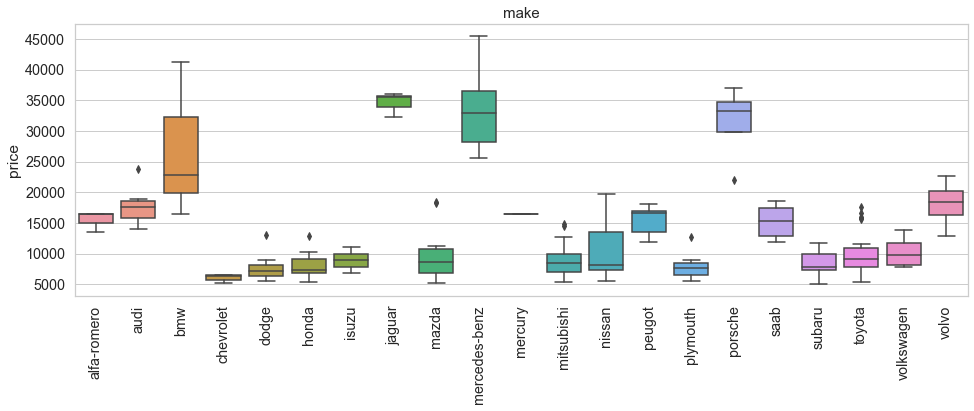

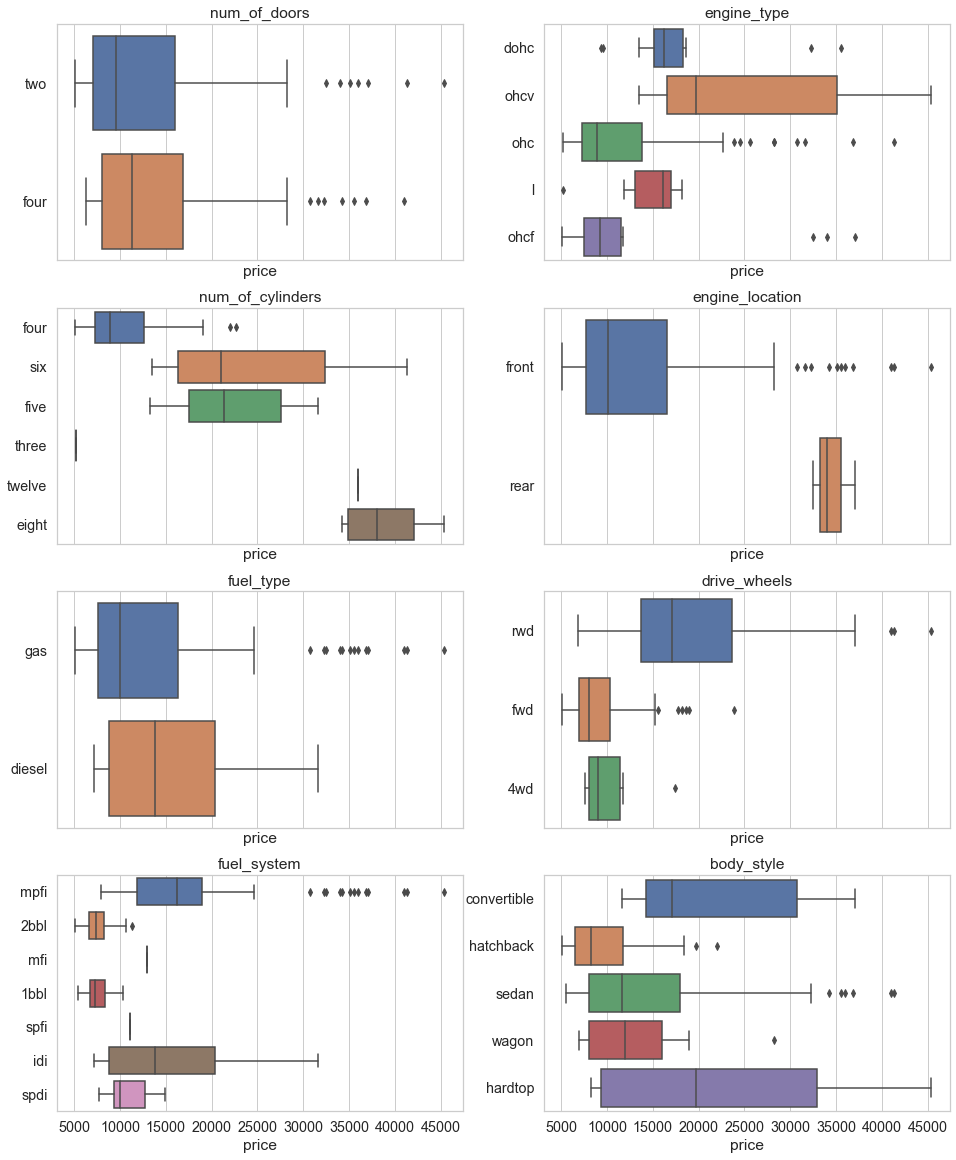

In [46]:
cat_cols = imports_85_norm.select_dtypes("object").columns

fig, ax = plt.subplots(figsize = (16, 5))

sns.boxplot(x = imports_85_norm["make"], y = imports_85_norm["price"], ax = ax,)
ax.tick_params(axis = "x", labelrotation = 90)
ax.set_xlabel("")
ax.set_title("make", fontsize = 15)

cat_cols2 = sorted(cat_cols[1:], reverse = True)

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (16, 20), sharex = True)

for i in range(len(cat_cols2)-1):
    if i < 4:
        sns.boxplot(y = imports_85_norm[cat_cols2[i]], x = imports_85_norm["price"], ax = ax[i, 0])
        ax[i,0].set_ylabel("")
        ax[i,0].set_title(cat_cols2[i])
    else:
        sns.boxplot(y = imports_85_norm[cat_cols2[i]], x = imports_85_norm["price"], ax = ax[i-4, 1])
        ax[i-4,1].set_ylabel("") 
        ax[i-4,1].set_title(cat_cols2[i])

# plt.tight_layout()        
plt.show()

In [47]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [48]:
train_cat, test_cat = split_dataset(imports_85_norm)

oe = OrdinalEncoder()

train_enc = oe.fit_transform(X = train_cat[cat_cols])
test_enc = oe.fit_transform(X = test_cat[cat_cols])

In [49]:
fs = SelectKBest(score_func = chi2, k = "all")
train_fs = fs.fit_transform(X = train_enc, y = train_cat["price"])
test_fs = fs.transform(X = test_enc)

feature_score_result = pd.DataFrame({"feature" : cat_cols, 
                                     "feature_score" : fs.scores_, 
                                     "test_pvalue" : ["{:.5f}".format(each) for each in fs.pvalues_]})
feature_score_result

,feature,feature_score,test_pvalue
0,make,153.146552,0.00000
1,fuel_type,4.000000,1.00000
2,aspiration,42.000000,0.71603
3,num_of_doors,24.000000,0.99853
4,body_style,10.403101,1.00000
5,drive_wheels,9.791045,1.00000
6,engine_location,48.000000,0.47285
7,engine_type,10.736842,1.00000
8,num_of_cylinders,10.192308,1.00000
9,fuel_system,30.475248,0.97717
